# Flat hydrogen

In this notebook we'll explore the the two-dimensional hydrogen atom using the two-dimensional Gaussian framework.
The Hamiltonian for the electron is given by
\begin{align}
    \hat{h} = \hat{t} - \frac{1}{\sqrt{x^2 + y^2}}.
\end{align}

In [175]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

from gaussians import G2D
import gaussians.two_dim_lib as tdl

from quantum_systems import BasisSet, SpatialOrbitalSystem

<IPython.core.display.Javascript object>

In [164]:
center = tuple((0, 0))
a = 2

X, Y = np.meshgrid(np.linspace(-5, 5, 401), np.linspace(-5, 5, 401))

gaussians = [G2D((i, j), a, A=center) for i in range(4) for j in range(4)]
# gaussians = [G2D((0, 0), 1.7, A=center)]  # , G2D((0, 0), 2)]
g2d_params = tuple(g.get_params() for g in gaussians)

<IPython.core.display.Javascript object>

In [165]:
t = tdl.construct_kinetic_operator_matrix_elements(g2d_params)
v = tdl.construct_coulomb_attraction_operator_matrix_elements(
    center, g2d_params
)
s = tdl.construct_overlap_matrix_elements(g2d_params)

h = t - v

<IPython.core.display.Javascript object>

In [166]:
bs = BasisSet(len(gaussians), dim=2)
bs.s = s
bs.h = h
bs.u = np.zeros((bs.l, bs.l, bs.l, bs.l))
bs.spf = np.array([g(X, Y, with_norm=False) for g in gaussians])

<IPython.core.display.Javascript object>

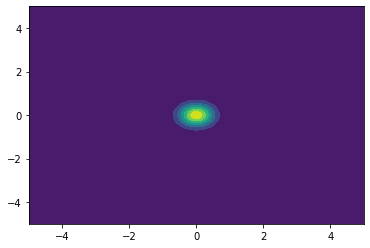

<IPython.core.display.Javascript object>

In [167]:
plt.contourf(X, Y, np.abs(bs.spf[0]) ** 2)

In [171]:
eps, C = scipy.linalg.eigh(bs.h, bs.s)
print(eps)

[-1.60730183  1.1752444   1.1752444   2.74418897  3.10306008  4.67065961
  6.13176001  6.13176001  7.10380958  7.10380958  8.81849878  9.00593112
  9.0306893  12.12988968 12.12988968 14.96250648]


<IPython.core.display.Javascript object>

In [172]:
bs_2 = bs.copy_basis()

<IPython.core.display.Javascript object>

In [173]:
bs_2.change_basis(C=C)

<IPython.core.display.Javascript object>

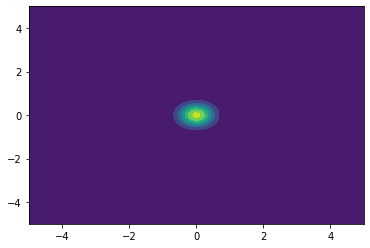

<IPython.core.display.Javascript object>

In [174]:
plt.contourf(X, Y, np.abs(bs_2.spf[0]) ** 2)